In [122]:
import sys
sys.path.append("/Users/roberto/code/robust-me-scripts/scripts")
sys.path.append("/Users/roberto/code/robust-me-scripts/scripts/config")
from figs import plot
import motion

# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
# import pandas as pd
import os
from numpy import *

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

import module
import settings

module.set_sys_paths()

from mrg.logging import MonolithicDecoder
from mrg.adaptors.transform import PbSerialisedTransformToPython
from mrg.transform.conversions import se3_to_components, build_se3_transform

import numpy as np
from config.data import *

In [120]:
relative_poses_path = "/private/tmp/flattened_novatel_generated_poses.monolithic"
# relative_poses_path = "/Users/roberto/data/odometry-comparisons/rugged_ro/dataset-name/motion_estimation/2018-06-21-16-24-39-long-hanborough-to-ori-V4-radar-leopon-trial-sunny-long-range/ground-truth/flattened_novatel_generated_poses.monolithic"
# relative_poses_path = "/Users/roberto/data/odometry-comparisons/rugged_ro/dataset-name/motion_estimation/2018-06-21-16-24-39-long-hanborough-to-ori-V4-radar-leopon-trial-sunny-long-range/standard-ro/radar_motion_estimation.monolithic"
# open monolithic and iterate frames
print("reading relative_poses_path: " + relative_poses_path)
monolithic_decoder = MonolithicDecoder(
    relative_poses_path)

# iterate mono
se3s = []
timestamps = []
for pb_serialised_transform, _, _ in monolithic_decoder:
    # adapt
    serialised_transform = PbSerialisedTransformToPython(
        pb_serialised_transform)
    se3s.append(serialised_transform[0])
    timestamps.append(serialised_transform[1])

# TODO: why is first reading a large spike?
# return se3s[1:], timestamps[1:]


reading relative_poses_path: /private/tmp/flattened_novatel_generated_poses.monolithic
importing  protobuf.transform.pbSerialisedTransform_pb2


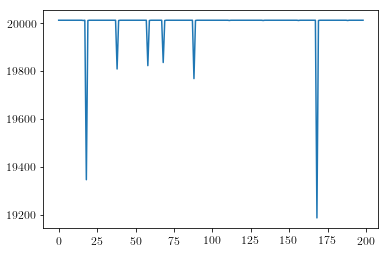

In [123]:
# print(se3s[1])
# plt.plot(timestamps[1800:2000]);
plt.plot(np.diff(timestamps[1800:2000],axis=0));

In [107]:
# get poses
poses = []
pose = np.identity(4)
for i in range(len(se3s)):
    pose = pose * se3s[i]
    poses.append(pose)

# get x,y coords
x = [pose[0, 3] for pose in poses]
y = [pose[1, 3] for pose in poses]

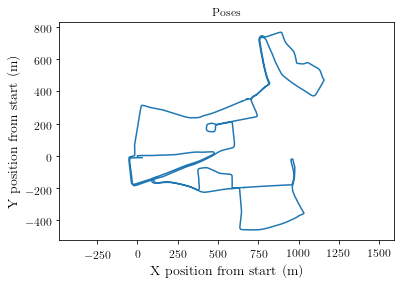

In [108]:
plt.plot(x,y);
plt.axis('equal');
plt.title('Poses');
plt.xlabel('X position from start (m)');
plt.ylabel('Y position from start (m)');

In [109]:
speeds = np.diff(x,axis=0)

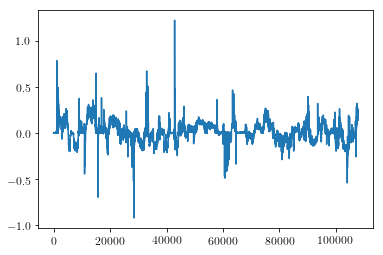

In [110]:
plt.plot(speeds);

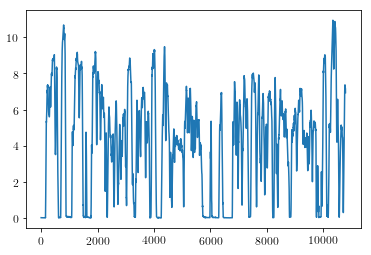

In [118]:
# get speeds
assert len(se3s) == len(timestamps)
speeds = []
TIMESTAMPS = []
deltatime_arr = []
for i in range(len(timestamps) - 1):
# for i in range(0,len(timestamps) - 1,10): # this fixed the glitches by skipping them
# for i in range(1000,2000):
    # work out speed
    delta_time = timestamps[i + 1] / settings.TIMESTAMP_CONVERSION \
        - timestamps[i] / settings.TIMESTAMP_CONVERSION
    deltatime_arr.append(delta_time)
    se3 = se3s[i]
    translation = se3[0:2, -1]
    incremental_distance = np.linalg.norm(translation)
    speed = incremental_distance / 0.02 #delta_time
    speeds.append(speed)
    TIMESTAMPS.append(timestamps[i])
plt.plot(speeds);

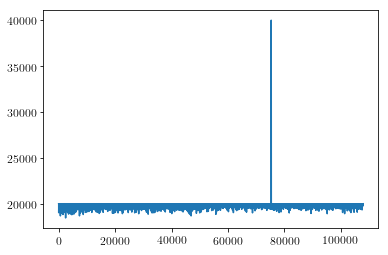

In [112]:
plt.plot(np.diff(TIMESTAMPS,axis=0));

In [115]:
len(timestamps)

107867